# DecisionTreeClassifier

The purpose of this notebook is to present the usage of DecisionTreeClassifier with scikit-learn library. Decision Tree is one of the predictive, non-parametric modeling approaches used for both classification and regression.
Trees consist of nodes and branches, the top node is called root and the nodes at the bottom of a branch are called leaves. In the training process (threes being built recursively) each node represents a specific feature that best splits observations into new paths. Best means that this is done by evaluating certain metrics, like the Gini index or the Entropy for categorical decision trees, or the Residual or Mean Squared Error for regression trees. Predicting the category or numerical target value of a new sample is very easy using Decision Trees - we just need to follow the path of a decision tree.

<b> Advantages: </b>
* easy to interpret (graphical and intuitive way to understand what our algorithm does)
* require fewer data to train (in comparison to other training methods)
* can be used for Classification and Regression
* simple and intuitive
* tolerant to missing values

<b> Disadvantages: </b>
* might be easly overfitted (max_depth parameter optimalization needed)
* they might be weak predictiors and require ensemple methods (i.e. random trees, XGBoost)


In [69]:
#necessary libraries

import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate
import matplotlib.pyplot as plt

In [70]:
df = pd.read_csv("Iris.csv")

In [71]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [72]:
#Data prearation: removing unique column Id, one hot encoding. 
#In order to simplify I will make only OvR predicion thats why columns for versicolor and virginica are removed.

df.drop("Id", axis=1, inplace=True)
df=pd.get_dummies(df, "Species")
df.drop(["Species_Iris-versicolor", "Species_Iris-virginica"], axis=1, inplace=True)

In [73]:
df.sample(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species_Iris-setosa
142,5.8,2.7,5.1,1.9,0
134,6.1,2.6,5.6,1.4,0
31,5.4,3.4,1.5,0.4,1
106,4.9,2.5,4.5,1.7,0
53,5.5,2.3,4.0,1.3,0


In [76]:
X = df.drop("Species_Iris-setosa", axis=1)
y = df["Species_Iris-setosa"]


#Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2)

In [78]:
#Building model

model = DecisionTreeClassifier(max_depth = 3)
model.fit(X_train, y_train)
pred_y = model.predict(X_test)
print('Accuracy score: %.2f' % accuracy_score(y_test, pred_y))

Accuracy score: 1.00


In [79]:
#Cross validation example

model = DecisionTreeClassifier(max_depth = 3)
cross_validate(model, X, y, cv=3, scoring = 'accuracy', return_train_score = True)

{'fit_time': array([0.00350595, 0.00287509, 0.00253105]),
 'score_time': array([0.00286007, 0.00203395, 0.00239897]),
 'test_score': array([1., 1., 1.]),
 'train_score': array([1., 1., 1.])}

NameError: name 'plot_boundary' is not defined

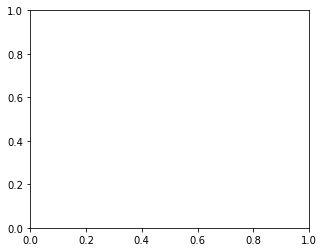

In [68]:
tree_classifiers = {'DTC' : DecisionTreeClassifier(max_depth = 3)}
fig, ax = plt.subplots(1,1, figsize = (5,4))
for name, mod in tree_classifiers.items():
    plot_boundary(ax, X,y, mod, [0,1])
    ax.set_title(name)
plt.tight_layout()